In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab as py
import sys
import numpy.ma as ma
from decimal import Decimal
import sqlite3
import pandas as pd
import os
from importlib import reload
from matplotlib import animation, rc
import matplotlib.animation as animation
from matplotlib.ticker import FormatStrFormatter
import types
from IPython.display import HTML
import contours
import blobs
import warnings

In [2]:
def delta_star():
    c_l = 8.6 #(m)
    R = 2.24 #(m)
    B = 1.8 #(Tesla)
    Te = 444 #(ev)
    mi_ref = 1.67236232e-27 #(kg)
    joule_conversion = 1.6022e-19
    m_i = 2*mi_ref
    e = 1.6022e-19
    om_cycl = (e*B)/m_i
    v_s = np.sqrt((2.*joule_conversion*Te)/m_i)
    rho_s = v_s/om_cycl
    d_star = rho_s*np.power((np.power(c_l,2)/(rho_s*R)),0.2)
    return d_star*100
delta_star()

1.6097351075980026

### Preparing the Data

In [3]:
arr_all = np.load('C:\\Users\\giannis\\Desktop\\Python_scrpts\\ti255\\ne_ti255_mid.npy')
arr_tor = arr_all.mean(2)
arr_avg = arr_tor.mean(0)
new_arr = arr_all[650,:,0,:]

In [4]:
'''Define the perturbed matrix, use a nine-point smoothing and swap axes to make it in R,Z form.'''
work = (new_arr-arr_avg)/arr_avg
sw = blobs.frame_smooth(work) 
sw = np.swapaxes(sw,0,1)
work = np.swapaxes(work,0,1)

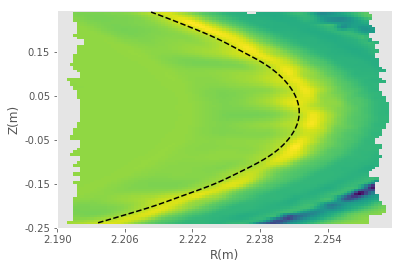

In [5]:
'''Plotting with pcolor.'''
x =  np.arange(0,sw.shape[0],1)
y = np.arange(0,sw.shape[1],1)
X,Y = np.meshgrid(x,y)
fig,ax=plt.subplots()
ax.pcolor(X,Y,sw[X,Y])
#setting the axes labels
x_lbl,y_lbl = blobs.plot_labels(blobs.Rmin,blobs.Rmax,blobs.Zmin,blobs.Zmax,5,5)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xticklabels(x_lbl)
ax.set_yticklabels(y_lbl)      
#drawing the separatrix (Need the right units)
R_sep, Z_sep = blobs.separatrix_transform(blobs.R_sep_list[293:-903],blobs.Z_sep_list[293:-903])
plt.plot(R_sep,Z_sep,'k--')
#plt.xlim(2.15,2.26)
#plt.ylim(-0.25,0.25)
plt.xlabel('R(m)')
plt.ylabel("Z(m)")
plt.show()    

In [5]:
C_l, P_l, L_l, E_l, A_l = blobs.analyze_frame(arr_all,650,0.15,0.99)

C:\Users\Giannis\Desktop\Python_scrpts\blobs.py:563: RuntimeWarning: invalid value encountered in sqrt
  res1=np.sqrt(up/down1)
C:\Users\Giannis\Desktop\Python_scrpts\blobs.py:564: RuntimeWarning: invalid value encountered in sqrt
  res2=np.sqrt(up/down2)


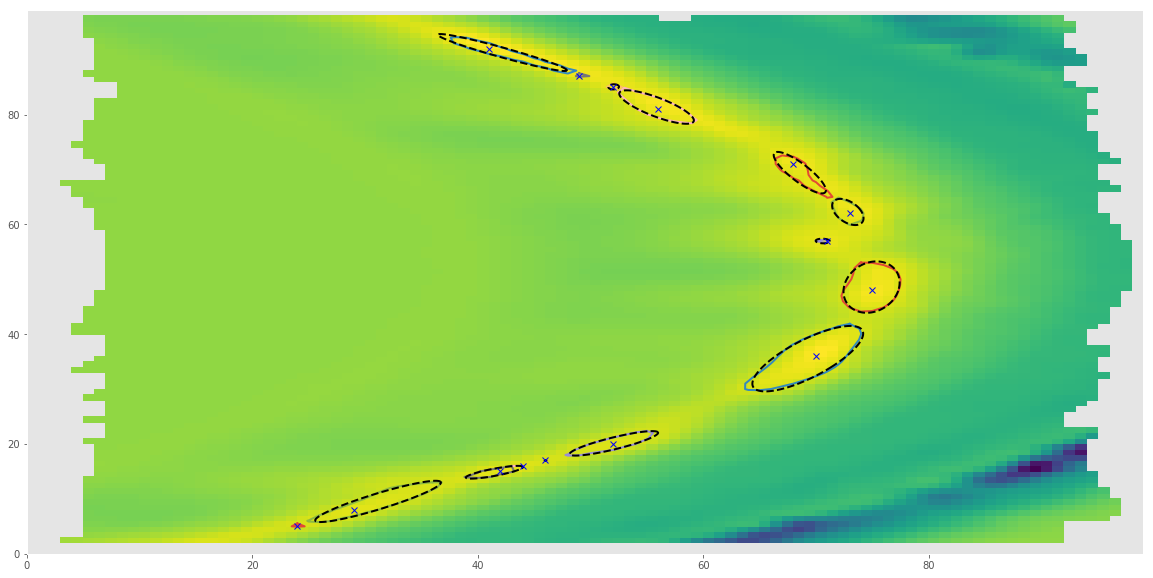

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
ax.pcolor(X,Y,sw[X,Y])
for contour in C_l:
    ax.plot(contour[:, 1],contour[:, 0], linewidth=2)
for j in range(len(E_l)):
    if ~np.isnan(E_l[j][0]).any():
        ax.plot(E_l[j][1]+E_l[j][0][0], E_l[j][2]+E_l[j][0][1],linewidth = 2, color = 'k',linestyle = "--")
    else:
        pass
for peak in P_l:
    ax.plot(peak[1],peak[2],"b", marker='x',markersize = 6)

### Database Creation

In [15]:
import seaborn as sns
plt.style.use('ggplot')
reload(blobs)

<module 'blobs' from 'C:\\Users\\Giannis\\Desktop\\Python_scrpts\\blobs.py'>

In [7]:
#blobs.db_creation(arr_all,0,689,0.15,0.99)

In [8]:
H = blobs.blob_history(0,688)

In [9]:
H.shape

(766, 689)

C:\Users\Giannis\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


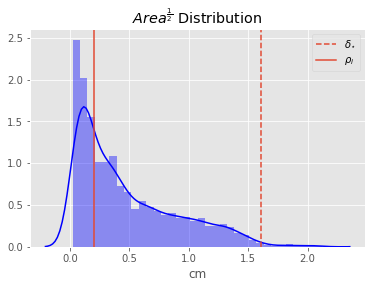

In [12]:
blobs.area_dist(0,688)

C:\Users\Giannis\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


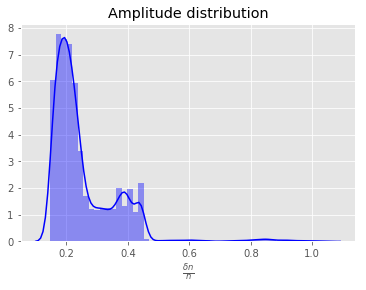

In [16]:
blobs.amplitude_dist(0,688)

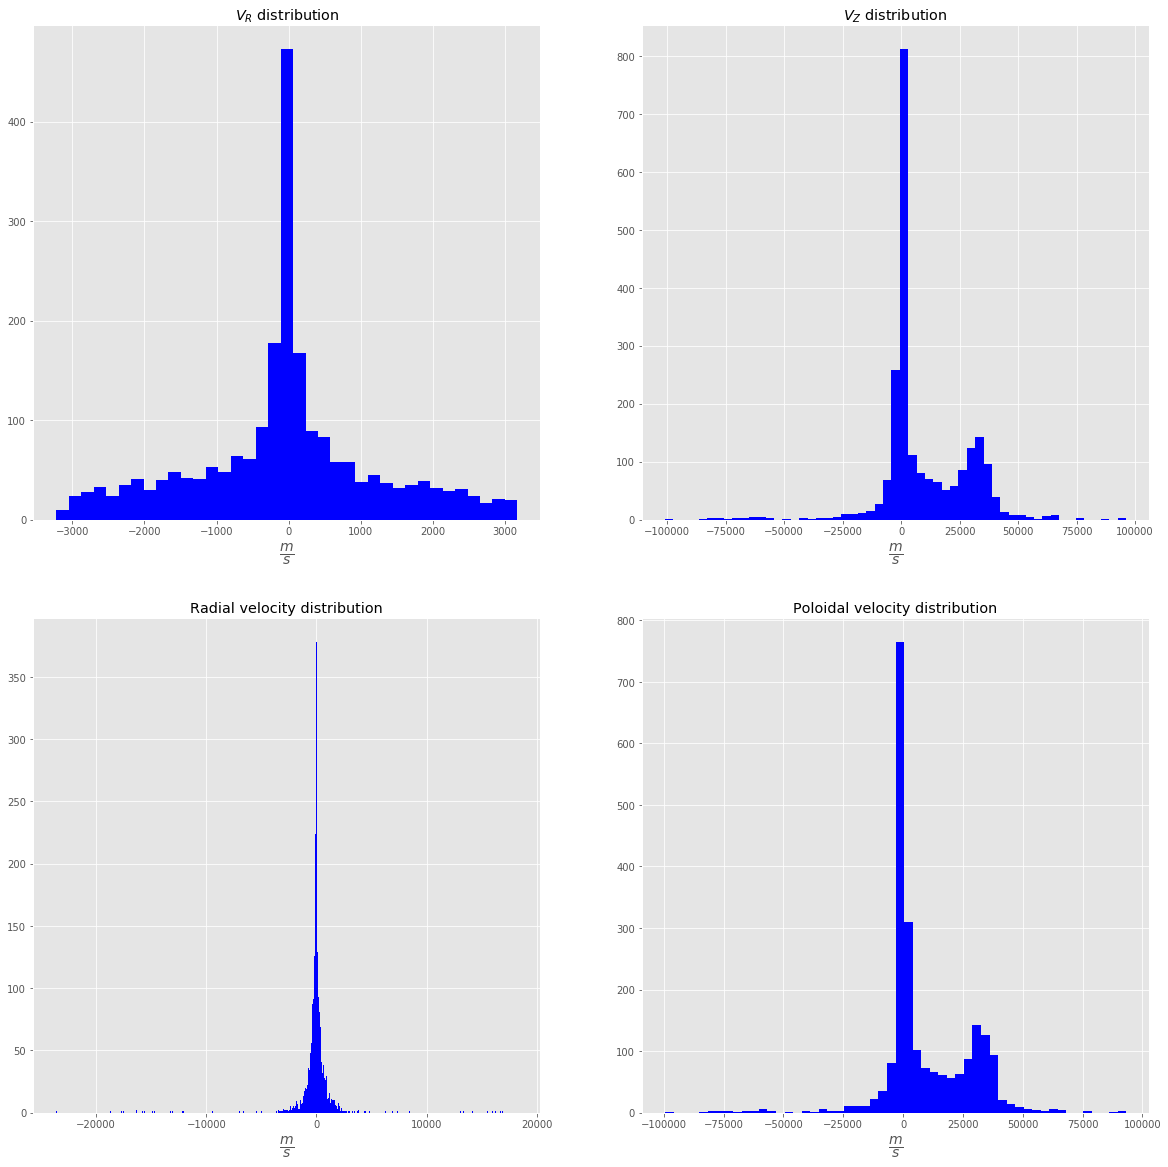

In [13]:
blobs.total_velocity_distributions(H)

In [23]:
reload(blobs)

<module 'blobs' from 'C:\\Users\\Giannis\\Desktop\\Python_scrpts\\blobs.py'>

C:\Users\Giannis\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Giannis\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Giannis\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Giannis\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' 

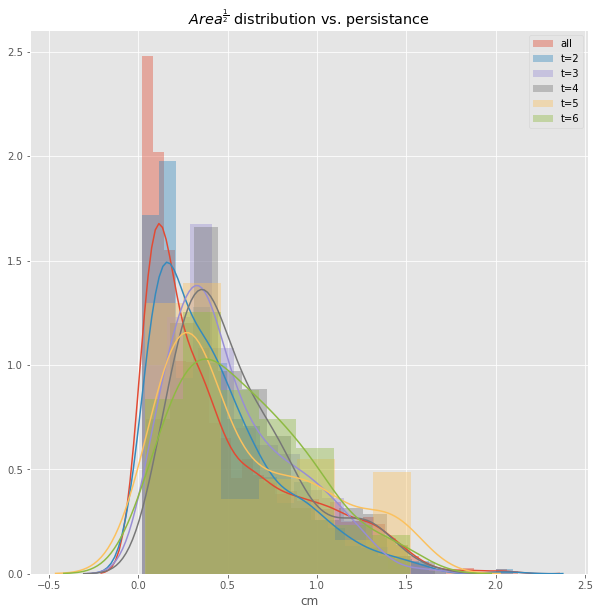

In [24]:
blobs.area_dist_persistance(H)

C:\Users\Giannis\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Giannis\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Giannis\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Giannis\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' 

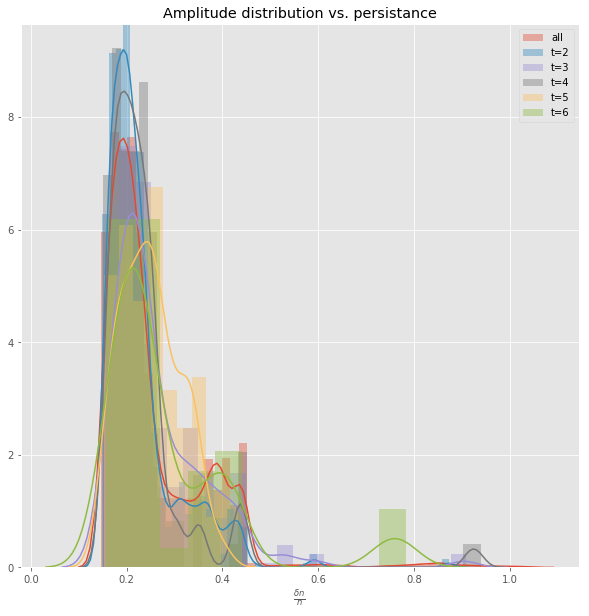

In [25]:
blobs.amplitude_dist_persistance(H)

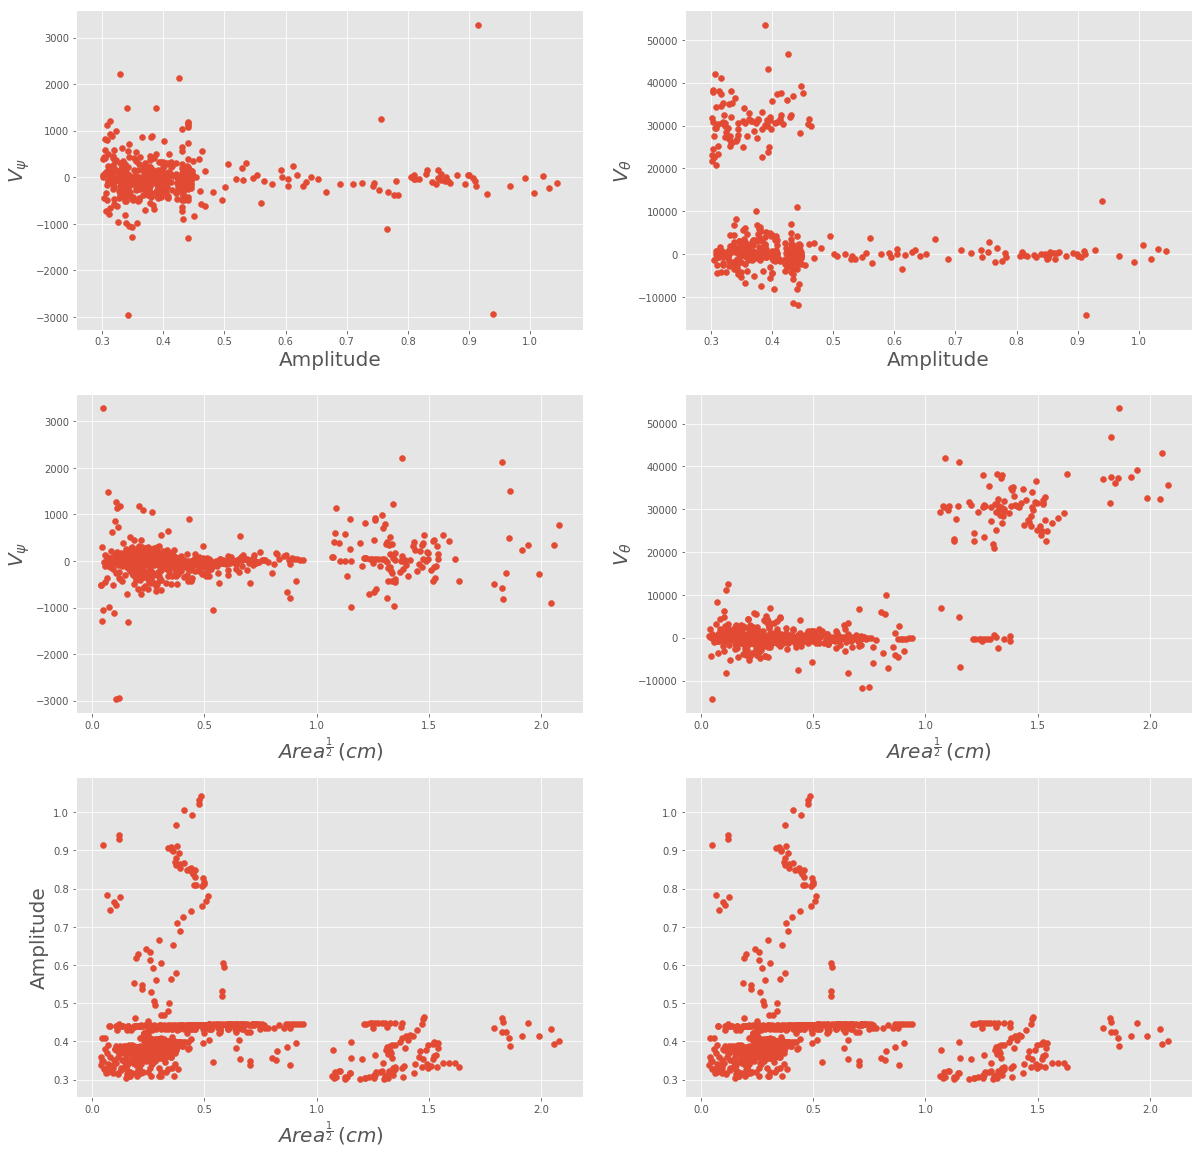

In [26]:
blobs.amplitude_velocity(H)

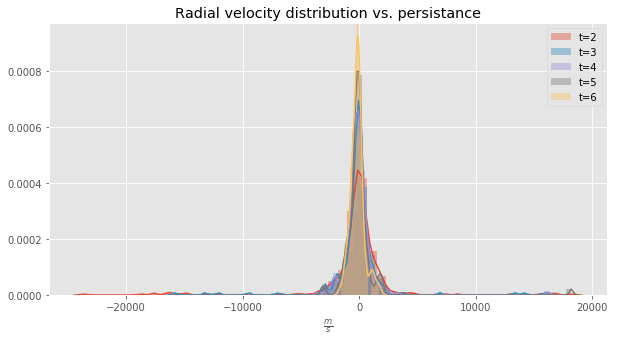

In [27]:
blobs.velocity_persistance_distributions(H)